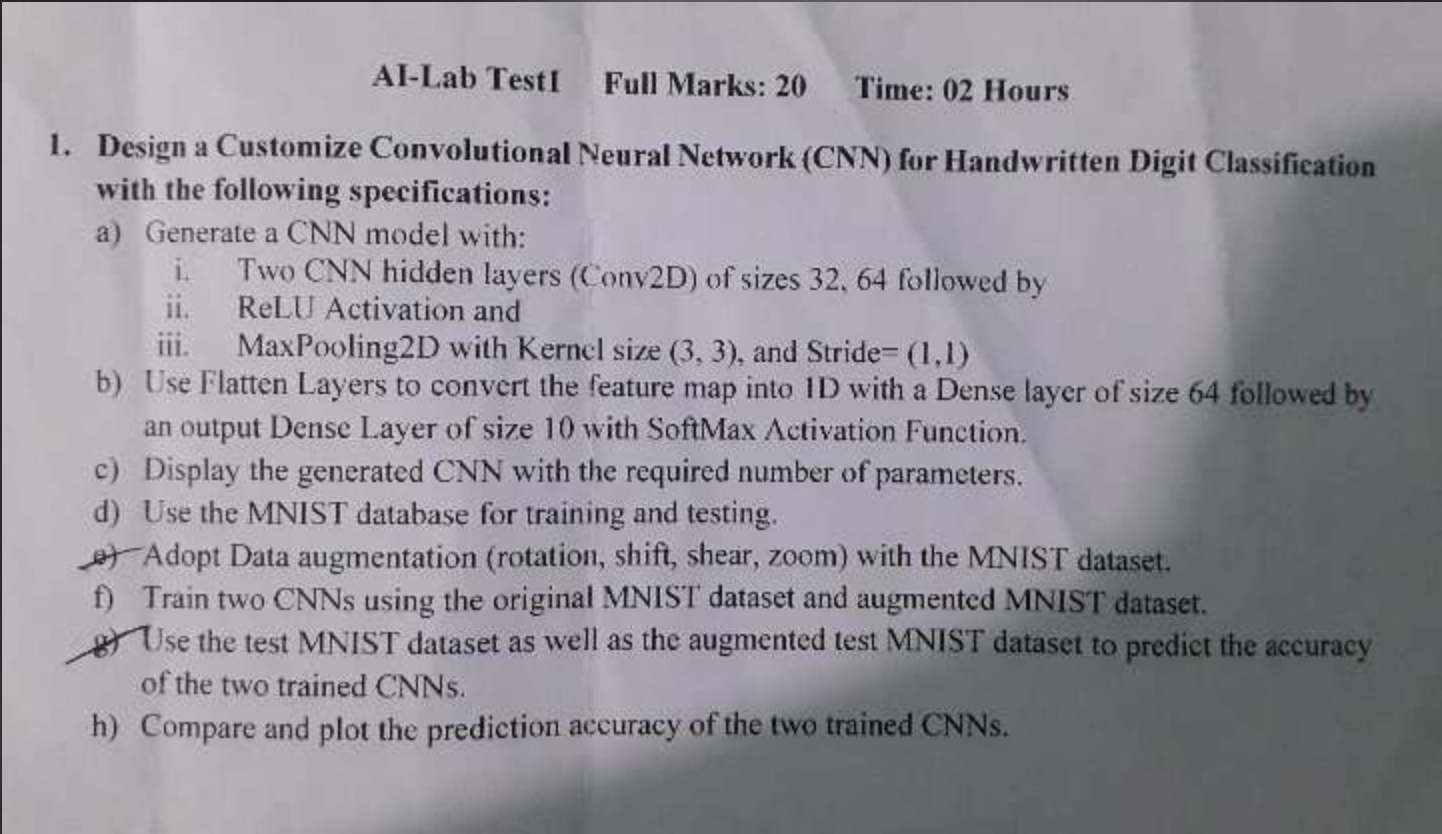

# Lab Exam Syllabus
1. Import Necessary Libraries
2. Distribute to Train, Test and Validation Set
3. Plot Sample Training Data with Proper Title, Caption, Figure No.
4. Make a Bar Plot of Train,Test, Validation Count
5. Augment Data and Plot
6. Generate a CNN model and Train,test, validate with non-augmented data
7. Generate a CNN model and train,test,validate with augmented (merged) data
8. Compare Test Accuracy of the Two Models
9. Use of Cut-Mix, Mix-Cut if possible



# Imports

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Conv2D, MaxPooling2D,Input,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Preprocess Data

In [ ]:
# Load Dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# Split of Validation Data
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.16666,random_state=42)

# Normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32')/255.0

X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))
X_val = X_val.reshape((X_val.shape[0],28,28,1))

# Convert y to categorical data
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

# Sample Training Data

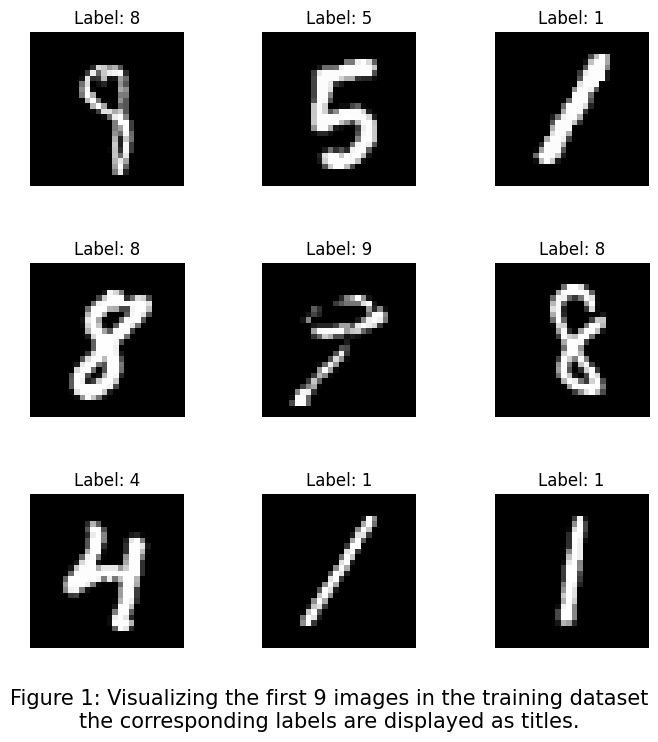

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)


for ax in axes.flatten():
    ax.axis('off')


for i, ax in enumerate(axes.flatten()):
    if i < 9:
        ax.imshow(X_train[i], cmap='gray')
        ax.set_title(f'Label: {np.argmax(y_train[i])}')
        ax.axis('off')


caption = "Figure 1: Visualizing the first 9 images in the training dataset\nthe corresponding labels are displayed as titles."
fig.text(0.5, 0.01, caption, ha='center', fontsize=15)

plt.show()

In [ ]:
print("Shape of Train_X : ",X_train.shape)
print("Shape of Train_Y : ",y_train.shape)
print("Shape of Test_X : ",X_test.shape)
print("Shape of Test_Y : ",y_train.shape)


X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))
X_val = X_val.reshape((X_val.shape[0],28,28,1))

Shape of Train_X :  (50000, 28, 28, 1)
Shape of Train_Y :  (50000, 10)
Shape of Test_X :  (10000, 28, 28, 1)
Shape of Test_Y :  (50000, 10)


# Distribution of Train, Test and Validation Data

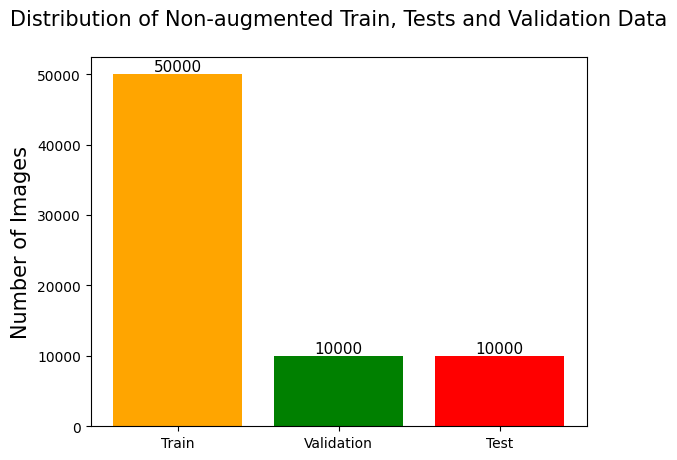

In [ ]:
fig, ax = plt.subplots()

ax.bar(['Train', 'Validation','Test'],[X_train.shape[0],X_val.shape[0],X_test.shape[0]],color=['orange','green','red'])

ax.set_ylabel('Number of Images',fontsize=15)
ax.set_title('Distribution of Non-augmented Train, Tests and Validation Data\n',fontsize=15)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,i.get_height(),i.get_height(),ha='center',va='bottom',fontsize=11)

# Sample Augmented Training Data

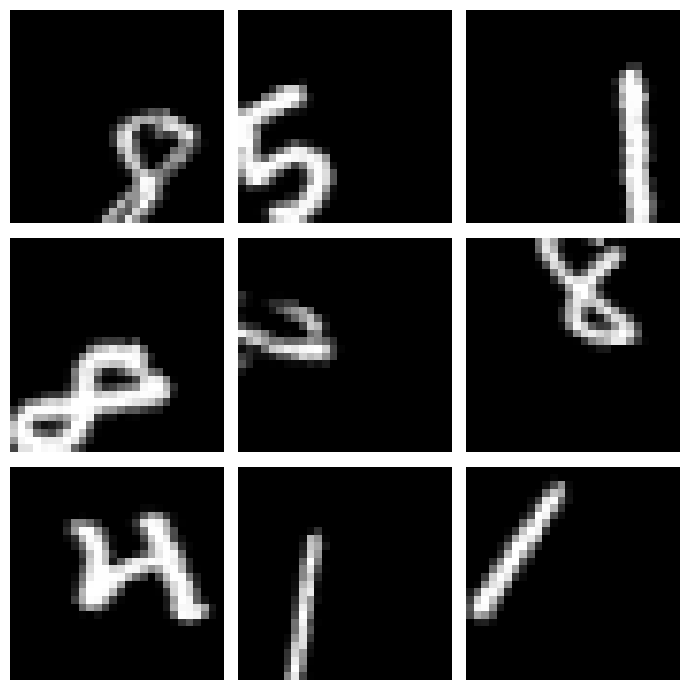

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range=0.2
)



datagen.fit(X_train)


augmented_images = []
augmented_labels = []

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=128, shuffle=False):
    for i in range(81):
        augmented_images.append(X_batch[i])
        augmented_labels.append(y_batch[i])
    if len(augmented_images) >= 81:
        break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


fig, axes = plt.subplots(3, 3, figsize=(7, 7))
axes = axes.flatten()

for img, ax in zip(augmented_images[:81], axes):
    ax.imshow(img.squeeze(), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

# 1(a,b,c) Generate a CNN Model

In [ ]:
input = Input(shape=(28,28,1))
x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

no_aug_model = Model(input,output,name="No_Augmentation_Model")

no_aug_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

no_aug_model.summary()

Model: "No_Augmentation_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 1600)    

# Copying the Same Model Architecture before Training

# 1.(d) Training and Testing

In [ ]:
history = no_aug_model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=128)

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 0.2628 - accuracy: 0.9229 - val_loss: 0.0809 - val_accuracy: 0.9757
Epoch 2/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 3/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 4/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 5/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 6/10
391/391 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0389 - val_accuracy: 0.9883
Epoch 7/10
391/391 [==============================] - 2s 4ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 

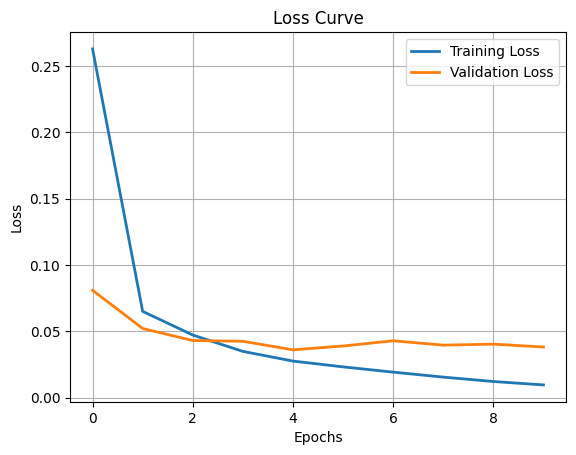

In [ ]:
# Loss curve
plt.plot(history.history['loss'],linewidth=2, label='Training Loss')
plt.plot(history.history['val_loss'],linewidth=2, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

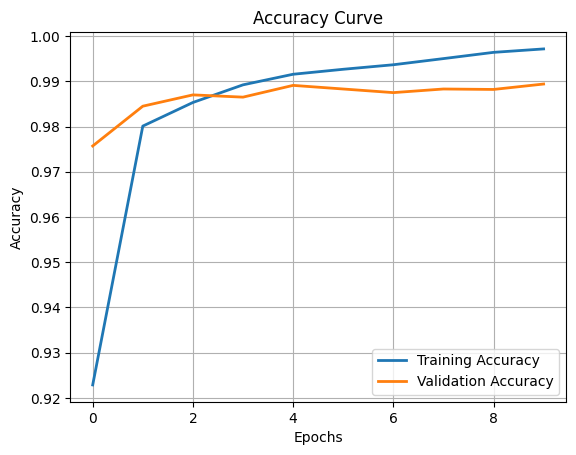

In [ ]:
# Accuracy curve
plt.plot(history.history['accuracy'], linewidth=2, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linewidth=2, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display the plot
plt.show()

# 1(e) Data Augmentation Model

In [ ]:
input = Input(shape=(28,28,1))
x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
x = MaxPooling2D()(x)
x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
output = Dense(10,activation='softmax')(x)

augmented_model = Model(input,output,name="Augmentation_Model")

augmented_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

augmented_model.summary()

Model: "Augmentation_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)       

In [ ]:
aug_data_gen = ImageDataGenerator(
    rotation_range=21,
    width_shift_range=0.11,
    height_shift_range=0.19,
    zoom_range=0.21,
    shear_range = 4.3,
    horizontal_flip=False,
    brightness_range=[0.2,0.5],
)

train_generator = aug_data_gen.flow(X_train,y_train,batch_size=32)
val_generator = aug_data_gen.flow(X_val,y_val,batch_size=32)
test_generator = aug_data_gen.flow(X_test,y_test,batch_size=32)

In [ ]:

X_train_augmented = []
y_train_augmented = []

X_test_augmented = []
y_test_augmented = []


for images_batch, labels_batch in train_generator:
  X_train_augmented.append(images_batch)
  y_train_augmented.append(labels_batch)



X_train_augmented = np.concatenate(X_train_augmented)
y_train_augmented = np.concatenate(y_train_augmented)

X_train_augmented = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train, y_train_augmented), axis=0)

print(f'Augmented train Images shape: {X_train_augmented.shape}, Augmented train Labels shape: {y_train_augmented.shape}')

for images_batch, labels_batch in test_generator:
  X_test_augmented.append(images_batch)
  y_test_augmented.append(labels_batch)



X_test_augmented = np.concatenate(X_test_augmented)
y_test_augmented = np.concatenate(y_test_augmented)

X_test_augmented = np.concatenate((X_test, X_test_augmented), axis=0)
y_test_augmented = np.concatenate((y_test, y_test_augmented), axis=0)

print(f'Augmented test Images shape: {X_test_augmented.shape}, Augmented test Labels shape: {y_test_augmented.shape}')

Augmented train Images shape: (75024, 28, 28, 1), Augmented train Labels shape: (75024, 10)
Augmented test Images shape: (15024, 28, 28, 1), Augmented test Labels shape: (15024, 10)


In [ ]:
history_augmented = augmented_model.fit(X_train_augmented,y_train_augmented,validation_data=(X_val,y_val),epochs=10)

print("Training Accuracy with Augmentation: \n",augmented_model.evaluate(X_train,y_train,verbose=0)[1])
print("Validation Accuracy with Augmentation  : \n",augmented_model.evaluate(X_val,y_val,verbose=0)[1])
print("Non-augmented Test Accuracy with Train Augmentation  : \n",augmented_model.evaluate(X_test,y_test,verbose=0)[1])
print("Augmented Test Accuracy with Augmentation  : \n",augmented_model.evaluate(X_test,y_test,verbose=0)[1])


Epoch 1/10
2345/2345 [==============================] - 9s 4ms/step - loss: 0.2777 - accuracy: 0.9148 - val_loss: 0.0618 - val_accuracy: 0.9804
Epoch 2/10
2345/2345 [==============================] - 8s 3ms/step - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 3/10
2345/2345 [==============================] - 8s 3ms/step - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 4/10
2345/2345 [==============================] - 8s 4ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0385 - val_accuracy: 0.9894
Epoch 5/10
2345/2345 [==============================] - 8s 3ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0385 - val_accuracy: 0.9897
Epoch 6/10
2345/2345 [==============================] - 8s 3ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0393 - val_accuracy: 0.9901
Epoch 7/10
2345/2345 [==============================] - 8s 3ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0401 - val_accuracy:

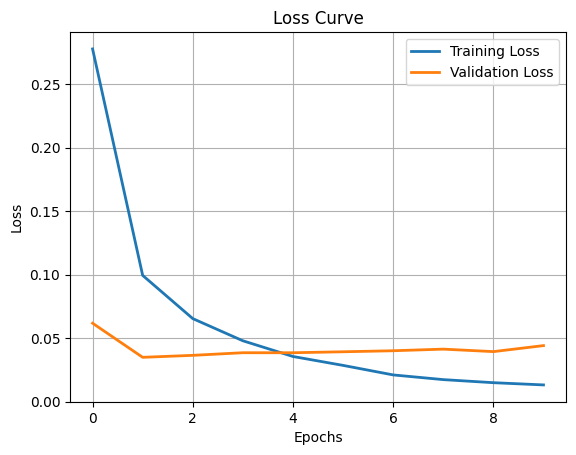

In [ ]:
plt.plot(history_augmented.history['loss'], linewidth=2, label='Training Loss')
plt.plot(history_augmented.history['val_loss'], linewidth=2, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

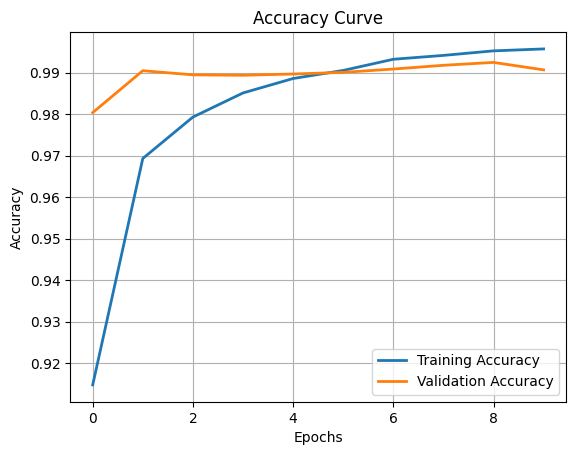

In [ ]:
plt.plot(history_augmented.history['accuracy'], linewidth=2, label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], linewidth=2, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Compare Test Accuracy of Two Models

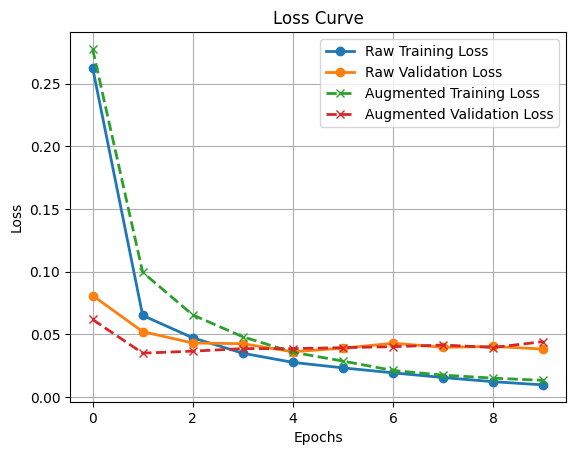

In [ ]:
# Loss curve
plt.plot(history.history['loss'], marker='o', linewidth=2, label='Raw Training Loss')
plt.plot(history.history['val_loss'], marker='o', linewidth=2, label='Raw Validation Loss')
plt.plot(history_augmented.history['loss'], marker='x', linewidth=2, linestyle='--', label='Augmented Training Loss')
plt.plot(history_augmented.history['val_loss'], marker='x', linewidth=2, linestyle='--', label='Augmented Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

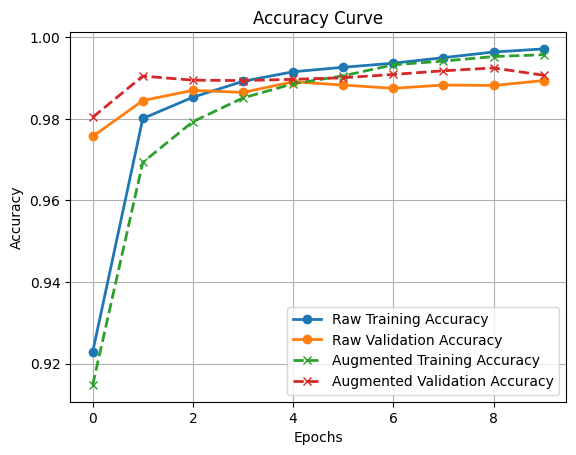

In [ ]:
# Accuracy curve
plt.plot(history.history['accuracy'], marker='o', linewidth=2, label='Raw Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', linewidth=2, label='Raw Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], marker='x', linewidth=2, linestyle='--', label='Augmented Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], marker='x', linewidth=2, linestyle='--', label='Augmented Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
print("On No Augmentation Model")
print("Test Score with Original Data: ",no_aug_model.evaluate(X_test,y_test,verbose=0)[1])
print("Test Score with Augmented Model: ",no_aug_model.evaluate(X_test_augmented,y_test_augmented,verbose=0)[1])

print("On Augmented Model")
print("Test Score with Original Data: ",augmented_model.evaluate(X_test,y_test,verbose=0)[1])
print("Test Score with Augmented Data: ",augmented_model.evaluate(X_test_augmented,y_test_augmented,verbose=0)[1])

On No Augmentation Model
Test Score with Original Data:  0.9901000261306763
Test Score with Augmented Model:  0.8936368227005005
On Augmented Model
Test Score with Original Data:  0.9907000064849854
Test Score with Augmented Data:  0.9819622039794922
